# HW 4

In [4]:
import numpy as np
import random
import time # I want to know how long the Sun code takes!
from matplotlib import pyplot as plt

## 1. Integral Processes: MC Edition (Optional but recommended!) 

Revisit HW1 problem 2a. Numerically integrate the function using the MC approach we discussed in class, i.e., instead of using equally spaced points to evaluate the integral, use points randomly drawn from the integral [1,5].

\begin{equation}
\int_1^5 \frac{1}{x^{3/2}} dx
\end{equation}



In [5]:
# Define all the function we need

# Function to be integrated
def function(x):
    return x**(-3./2.)

# Function to return a random number between 0 and 1
def gen_random(seed):
    a = 1664525
    c = 1013904223
    m = 4294967296
    x = (a*seed + c)%m
    return x/m, x

# Function to return an array of random numbers between 0 and 1
def rand_array(seed,N):
    seeds = [seed]
    result = []
    for i in range(int(N)):
        num, seed = gen_random(seeds[i])
        seeds.append(seed)
        result.append(num)
    return result

# Function to do the integral
def random_integral(func, lo, hi, Nstep):
    dx = (hi-lo)/Nstep
    # Define array of Nstep random numbers in the interval [lo, hi]
    xi = np.array(rand_array(1, Nstep))*(hi-lo)+lo 
    #Evaluate the function at the points
    points = func(xi)
    return dx*np.sum(points)

Text(0, 0.5, 'N')

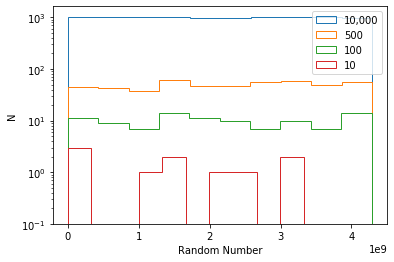

In [6]:
# Test the Random Number generator. Make sure nothing is weird ...

N = 10000 # Number to generate
seed = 1 # Initial seed
results = [seed]
for i in range(N):
    # Use the new random number as the new seed
    norm, rand = gen_random(results[i])
    results.append(rand)
    
plt.hist(results, histtype='step', label='10,000', log=True)
plt.hist(results[0:500], histtype='step', label='500')
plt.hist(results[0:100], histtype='step', label='100')
plt.hist(results[0:10], histtype='step', label='10')
plt.legend()
plt.xlabel('Random Number')
plt.ylabel('N')


# Looks pretty random to me!

1.1055728090000843 [1.3262354427419538, 1.109229555348458, 1.0905864824354985, 1.1144662558010414, 1.104951049702442]


Text(0.5, 0, 'Log (N points)')

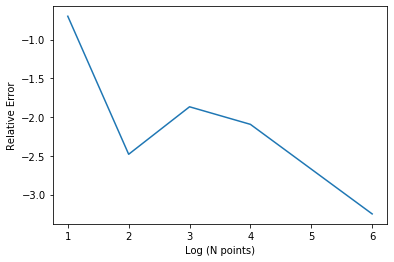

In [7]:
### Start Calculation for Integral ###

# Set integral limits
a = 1.0
b = 5.0

# Define variables
Npoints = np.array([10, 100., 1000., 10000.,1000000]) # Number of points in the integral
analytic = -2/np.sqrt(5)+2 # True Solution
num_int = []  # Array to store the result

# Loop through the number of points
for i,n in enumerate(Npoints):
    num_integral = random_integral(function, a, b, n)
    num_int.append(num_integral)
    
print(analytic, num_int)
plt.plot(np.log10(Npoints), np.log10(np.abs(num_int-analytic)/analytic))
plt.ylabel('Relative Error')
plt.xlabel('Log (N points)')

# Generally trending to smaller error with increasing number of points as we'd expect!

## 2. A random stroll from the center of the Sun

Photons created by nuclear fusion at the Sun's center do not simply escape or "free-stream" outwards. Instead, they take a significant amount of time to get out due to the high probability of scattering (owing to the relatively large Thomson cross section for scattering), i.e., they take a random walk.

Assume the typical mean free path of a photon is $ l  \simeq 4 x10^{-1}$ cm. Let’s consider a theorist's sun, which is a 2 dimensional circle with radius $1R_\odot$. Every time a photon hits an electron (after going 1 mean free path), it is scattered in an arbitrary direction $\theta$. Roughly how long does it take for a photon to escape the Sun after being emitted? (You can round to the nearest power of 10).

In [8]:
#Set parameters

mfp = 4.e-1 # mean free path in cm
rsun = 700   # cm "solar radius"
c = 3e10    # cm/s
python_random = True # Use built-in python random number generator

# Code in our own random number generator
# We will start with seed = 1 (initialized below); each x will be our new seed
# Note we also need our random number generator to return a number between 0 and 1
# We can get this by doing x/m
def gen_random_norm(seed):
    a = 1664525
    c = 1013904223
    m = 4294967296
    x = (a*seed + c)%m
    return x/m, x
    
# Define a function ot move the photon each timestep
def photon_move(photon_pos, mfp, python_random):
    
    if python_random:
        theta = random.random()*2.*np.pi #new random angle to move in
        seed = 1
    else:
        theta,seed = gen_random(photon_pos[3])
        theta *= 2.*np.pi
    x = photon_pos[0]+mfp*np.cos(theta) #mean free path * cos(theta)
    y = photon_pos[1]+mfp*np.sin(theta) #mean free path * sin(theta)

    return [x,y,theta,seed]


# Initialize  Set the firsst photon at center of the sun at time = 0
sun_center = [0,0]
photon_pos = [0,0,0,1] # Initialize the photon position and random seed
number_of_steps = 0
initwallclock = time.perf_counter()  #Get initial wall-clock time

photon_radius = np.sqrt((photon_pos[0]-sun_center[0])**2. + (photon_pos[1]-sun_center[1])**2.)
while photon_radius < rsun:
    
    photon_pos = photon_move(photon_pos, mfp, python_random)
    photon_radius = np.sqrt( (photon_pos[0]-sun_center[0])**2. + (photon_pos[1]-sun_center[1])**2.)
    
    #print('Photon radius is: ', photon_radius, photon_pos[2])
    number_of_steps += 1
    
total_distance_moved = number_of_steps * mfp # cm
total_time_elapsed = total_distance_moved/c # seconds

finalwallclock = time.perf_counter()  #Get final wall-clock time

print('Total time elapsed is: %0.5e s'%total_time_elapsed)
print('Total wall clock time elapsed is %0.5e min'%((finalwallclock-initwallclock)/60))

Total time elapsed is: 8.80010e-05 s
Total wall clock time elapsed is 5.66369e-01 min


In order to extrapolate the true escape time, I run the above with several different solar radii. And, because I'm curious, I insert a timer function in order to find out how long it takes the code to execute ("wall clock time") for each radius. I find:

#### radius (cm) | time (s) (py random) | wallclock (min) (py random) | time (s) (my random) | wallclock (min) (my random)


 70   |       2.4e-7               |           0.003             |           3.3e-7       |        0.003 
 
700   |       4.8e-5               |           0.30              |           1.5e-5       |         0.15

Note each time you run you'll get slightly different values for the elapsed time (unless you fix the seed)
and wallclock time. Also note print statements add time, too, sometimes alot!

Increasing the radius by a factor of 10 makes the journey take ~43 times long (I found anywhere from a factor of 30 to 200). The actual Sun's radius is 7e10cm (8 orders of magnitude longer than 700), which means it would take 5 years (or up to a few million!) for the photon to escape.
OMG -- this is a long stroll!!

For our timing study, using the random number generator, each power of 10 takes the calculation ~30-100 times longer. So the total time to do this MC problem would be as much as 100,000 years! You would probably not be able to turn in this HW by the end of the semester. This shows the power of:

* (1) extrapolation/estimation when you can 
* (2) parallel computing when you need an exact answer (we'll see this more next unit) 
* (3) optimizing your code; this can be human time well spent. 

# 2. Observing Dusty Protostars

## 2a. Search through the code ...

Searching through the code on GitHub (https://github.com/hyperion-rt/hyperion) I find that random numbers crop up in a large number of places, generally calling upon built-in random number generators for python and fortran: 

1. Example initialization with sources on a Cartesian grid, where the sources are initialized to random positions. 
2. Initialization of grid positions (grid\_geometry\_common\_3d.f90, grid\_geometry\_voronoi.f90). No hard-wired seed.
3. To initialize photon direction and angles (e.g., for an emitting source such as a star or disk in source\_type.f90 or monochromatic distribution grid\_monochromatic.f90) %and to model limb-darkening of the lines
4. To determine the optical depth until an interaction occurs (forced\_interaction.f90 and iter\_lucy.f90 and iter\_final.f90 and iter\_final\_mono.f90)
5. To initialize the positions of the Voronoi grid. (seed appears fixed) (voropp\_wrap.cc)
6. Sampling new directions, e.g., to construct images via peel-off process (grid\_mrw\_3d.f90)

In some places the code includes a hardwired random seed, which is ensured to be the same with this line: 
"random.seed('hyperion')  # ensure that random numbers are the same every time." 

However, in the parallelization routines the random seed varies with the processor doing the calculation, i.e., each processor gets its own random seed (mpi\_routines\_nompi.f90, "call set\_seed(seed + rank)"), which suggests that the calculations will not be deterministic with the number of processors. It is not clear that the random number generator used in the Fortran code is fixed.


## 2b. Set up a protostar ...

In [9]:
from hyperion.model import AnalyticalYSOModel
from hyperion.model import ModelOutput
from hyperion.util.constants import *

nphotons = 10000
nviews = 5
model_init = 'hyper_0.4m.rtin' # Initial Model file
model_out = 'hyper_0.4m.rtout' # Output result
dustfile = 'kmh94_3.1_hg.hdf5' # Dust file

# Initialize the model and parameters
m = AnalyticalYSOModel()

# Set stellar parameters
m.star.luminosity = 5 * lsun
m.star.radius = 2 * rsun
m.star.temperature = 6200.

# Add a flared disk
disk = m.add_flared_disk()
disk.mass = 0.01 * msun             # Disk mass
disk.rmin = 10 * rsun               # Inner radius
disk.rmax = 200 * au                # Outer radius
disk.r_0 = m.star.radius            # Radius at which h_0 is defined
disk.h_0 = 0.01 * disk.r_0          # Disk scaleheight at r_0
disk.p = -1                         # Radial surface density exponent
disk.beta = 1.25                    # Disk flaring power
disk.dust = dustfile

# Add an envelope
envelope = m.add_power_law_envelope()
envelope.mass = 0.4 * msun          # Envelope mass
envelope.rmin = 200 * au            # Inner radius
envelope.rmax = 10000 * au          # Outer radius
envelope.power = -2                 # Radial power
envelope.r_0 = 200 * au
envelope.dust = dustfile

# Use raytracing to improve s/n of thermal/source emission
m.set_raytracing(True)

# Use the modified random walk
m.set_mrw(True, gamma=2.)

# Set up grid
m.set_spherical_polar_grid_auto(199, 99, 5)

# Set up SED for 10 viewing angles
sed = m.add_peeled_images(sed=True, image=False)
sed.set_viewing_angles(np.linspace(0., 90., nviews), np.repeat(45., nviews))
sed.set_wavelength_range(150, 0.02, 2000.)
sed.set_track_origin('basic')

# Set number of photons
m.set_n_photons(initial=nphotons, imaging=nphotons,
                raytracing_sources=nphotons, raytracing_dust=nphotons)

# Set number of temperature iterations
m.set_n_initial_iterations(5)

# Write out file
m.write(model_init)
m.run(model_out, mpi=True, overwrite=True)

INFO: Disk density is being re-scaled by a factor of 0.94 to give the correct mass. [hyperion.densities.flared_disk]
INFO: Normalization factor for envelope mass:  0.99 [hyperion.densities.power_law_envelope]
INFO: Merging densities (identical hashes) [hyperion.model.model]


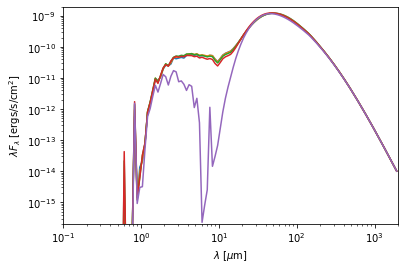

In [10]:
# Plot the SEDs stored in the model file:

# Open the model
m = ModelOutput(model_out)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Extract the SED for the smallest inclination and largest aperture, and
# scale to 300pc. In Python, negative indices can be used for lists and
# arrays, and indicate the position from the end. So to get the SED in the
# largest aperture, we set aperture=-1.

# Plot the SED. The loglog command is similar to plot, but automatically
# sets the x and y axes to be on a log scale.
for i in range(nviews):
    sed = m.get_sed(inclination=i, aperture=-1, distance=300 * pc)
    ax.loglog(sed.wav, sed.val)

# Add some axis labels (we are using LaTeX here)
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/s/cm$^2$]')

# Set view limits
ax.set_xlim(0.1, 2000.)
ax.set_ylim(2.e-16, 2.e-9)

plt.show()
# Write out the plot
#fig.savefig('SED_fiducial.png')


The SEDs of the model protostar exhibit two peaks:  one at  $\sim 50 \mu$m, which represents reprocessed radiation from the envelope, and one at $\sim 2 \mu$m, which is warmer radiation from the star and disk. 

The curves show wiggles at short wavelengths. Most of this is caused by poor photon statistics, i.e.,  the peak of the emission at long wavelengths is quite smooth because it is well-sampled. Note that the number of photons required for well-sampled images is about 10 times higher. 

There are a few dips around $\sim 8- 10 \mu$m; these are dust absorption features. There is a particularly prominent silicate absorption feature that appears around 9.7$\mu$m, which is faintly visible. The big dip of the purple curve occurs for an edge-on view of the disk, where the high optical depth + scattering removes a significant amount of photons from that line-of-sight.

For each of the different angles the SED has a slightly different shape, which is more noticeable at shorter wavelengths. The general explanation is that the difference is produced by differences in the amount of material along the line of sight. In particular, the purple line represents a view where the disk is edge-on to the line-of-sight. The lower emission is caused by the larger fraction of stellar photons being absorbed by the disk along the line of sight. 

## 3c. Vary the number of photon packets and grid resolution. 

How many photons and what resolution would you need to produce a converged SED? Describe your convergence criteria and make a plot showing the dependence of the SED on different values.


For convergence it depends on what wavelength we care about. If we want to beat down the noise at short wavelenghts, say $\leq 10 \mu$m, where the mfp is very short and photons are quickly absorbed, then we will need a lot of photons. For our fiducial problem we can see that the SEDs start to be noisy around ~ 20 $\mu$m. Let's define convergence as when the flux doesn't change by more than 10% when the resolution increases by 2. 

Alternatively, the convergence can be specified by the function m.set_convergence(), which determines the convergence based on the change in the internal energy between iterations.

In [11]:
n_mult=[1, 2, 4, 8, 16]

for n in n_mult:
    print("Calculating ", n)
    nphotons = np.float(n)*1e4
    model_out = 'hyper_0.4m_%ie4.rtout' %n # Output result

    # Initialize the model and parameters
    m = AnalyticalYSOModel()

    # Set stellar parameters
    m.star.luminosity = 5 * lsun
    m.star.radius = 2 * rsun
    m.star.temperature = 6200.

    # Add a flared disk
    disk = m.add_flared_disk()
    disk.mass = 0.01 * msun             # Disk mass
    disk.rmin = 10 * rsun               # Inner radius
    disk.rmax = 200 * au                # Outer radius
    disk.r_0 = m.star.radius            # Radius at which h_0 is defined
    disk.h_0 = 0.01 * disk.r_0          # Disk scaleheight at r_0
    disk.p = -1                         # Radial surface density exponent
    disk.beta = 1.25                    # Disk flaring power
    disk.dust = dustfile

    # Add an envelope
    envelope = m.add_power_law_envelope()
    envelope.mass = 0.4 * msun          # Envelope mass
    envelope.rmin = 200 * au            # Inner radius
    envelope.rmax = 10000 * au          # Outer radius
    envelope.power = -2                 # Radial power
    envelope.r_0 = 200 * au
    envelope.dust = dustfile

    # Use raytracing to improve s/n of thermal/source emission
    m.set_raytracing(True)

    # Use the modified random walk
    m.set_mrw(True, gamma=2.)

    # Set up grid
    m.set_spherical_polar_grid_auto(199, 99, 5)

    # Set up SED for 10 viewing angles
    sed = m.add_peeled_images(sed=True, image=False)
    sed.set_viewing_angles(np.linspace(0., 90., nviews), np.repeat(45., nviews))
    sed.set_wavelength_range(150, 0.02, 2000.)
    sed.set_track_origin('basic')

    # Set number of photons
    m.set_n_photons(initial=nphotons, imaging=nphotons,
                raytracing_sources=nphotons, raytracing_dust=nphotons)

    # Set number of temperature iterations
    m.set_n_initial_iterations(5)

    # Write out file
    m.write(model_init)
    m.run(model_out, mpi=True, overwrite=True)

Calculating  1
INFO: Disk density is being re-scaled by a factor of 0.94 to give the correct mass. [hyperion.densities.flared_disk]
INFO: Normalization factor for envelope mass:  0.99 [hyperion.densities.power_law_envelope]
INFO: Merging densities (identical hashes) [hyperion.model.model]
Calculating  2
INFO: Disk density is being re-scaled by a factor of 0.94 to give the correct mass. [hyperion.densities.flared_disk]
INFO: Normalization factor for envelope mass:  0.99 [hyperion.densities.power_law_envelope]
INFO: Merging densities (identical hashes) [hyperion.model.model]
Calculating  4
INFO: Disk density is being re-scaled by a factor of 0.94 to give the correct mass. [hyperion.densities.flared_disk]
INFO: Normalization factor for envelope mass:  0.99 [hyperion.densities.power_law_envelope]
INFO: Merging densities (identical hashes) [hyperion.model.model]
Calculating  8
INFO: Disk density is being re-scaled by a factor of 0.94 to give the correct mass. [hyperion.densities.flared_disk

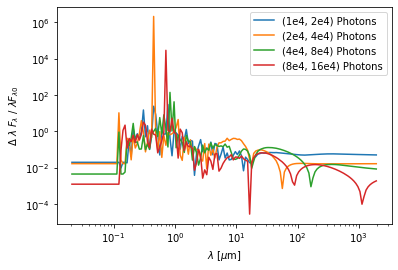

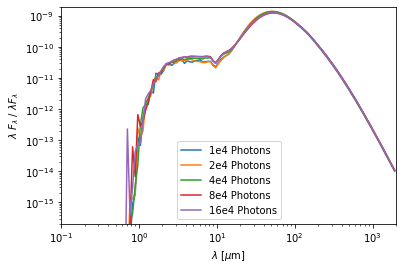

In [12]:
# Compare the models for different numbers of nphoton

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Add some axis labels 
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\Delta$ $\lambda$ $F_\lambda$ / $\lambda F_{\lambda 0}$')

m1 = ModelOutput('hyper_0.4m_1e4.rtout')
for n in n_mult[1:]:
    nphotons = np.float(n)*1e4
    m2 = ModelOutput('hyper_0.4m_%ie4.rtout' %n) # Output result

    sed1 = m1.get_sed(inclination=0, aperture=-1, distance=300 * pc)
    sed2 = m2.get_sed(inclination=0, aperture=-1, distance=300 * pc)
    ax.loglog(sed2.wav, np.abs((sed2.val-sed1.val)/sed1.val), label='(%ie4, %ie4) Photons'%(n/2,n))

    m1 = m2

ax.legend()
plt.show()
# Write out the plot
#fig.savefig('SED_fiducial.png')


# Create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Add some axis labels 
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda$ $F_\lambda$ / $\lambda F_{\lambda}$')

for n in n_mult:
    nphotons = np.float(n)*1e4
    m = ModelOutput('hyper_0.4m_%ie4.rtout' %n) # Output result

    sed = m.get_sed(inclination=0, aperture=-1, distance=300 * pc)
    ax.loglog(sed.wav, sed.val, label='%ie4 Photons'%n)


# Set view limits
ax.set_xlim(0.1, 2000.)
ax.set_ylim(2.e-16, 2.e-9)

ax.legend()
plt.show()


From 1-10 $\mu$m it appears that for each factor of 2 the solution changes by <= 10%. By about 4e4 photons the solution looks reasonably converged. The shorter wavelengths appear to require at least 1e5 photons if not more.

In [13]:
#Vary the grid resolution.
n_mult=[1, 2, 4, 8]

for n in n_mult:
    print("Calculating ", n)
    nphotons = 2e4 #
    model_out = 'hyper_0.4m_2e4_%igrid.rtout' %n # Output result

    # Initialize the model and parameters
    m = AnalyticalYSOModel()

    # Set stellar parameters
    m.star.luminosity = 5 * lsun
    m.star.radius = 2 * rsun
    m.star.temperature = 6200.

    # Add a flared disk
    disk = m.add_flared_disk()
    disk.mass = 0.01 * msun             # Disk mass
    disk.rmin = 10 * rsun               # Inner radius
    disk.rmax = 200 * au                # Outer radius
    disk.r_0 = m.star.radius            # Radius at which h_0 is defined
    disk.h_0 = 0.01 * disk.r_0          # Disk scaleheight at r_0
    disk.p = -1                         # Radial surface density exponent
    disk.beta = 1.25                    # Disk flaring power
    disk.dust = dustfile

    # Add an envelope
    envelope = m.add_power_law_envelope()
    envelope.mass = 0.4 * msun          # Envelope mass
    envelope.rmin = 200 * au            # Inner radius
    envelope.rmax = 10000 * au          # Outer radius
    envelope.power = -2                 # Radial power
    envelope.r_0 = 200 * au
    envelope.dust = dustfile

    # Use raytracing to improve s/n of thermal/source emission
    m.set_raytracing(True)

    # Use the modified random walk
    m.set_mrw(True, gamma=2.)

    # Set up grid
    m.set_spherical_polar_grid_auto(199*n, 99*n, 5*n)

    # Set up SED for 10 viewing angles
    sed = m.add_peeled_images(sed=True, image=False)
    sed.set_viewing_angles(np.linspace(0., 90., nviews), np.repeat(45., nviews))
    sed.set_wavelength_range(150, 0.02, 2000.)
    sed.set_track_origin('basic')

    # Set number of photons
    m.set_n_photons(initial=nphotons, imaging=nphotons,
                raytracing_sources=nphotons, raytracing_dust=nphotons)

    # Set number of temperature iterations
    m.set_n_initial_iterations(5)

    # Write out file
    m.write(model_init)
    m.run(model_out, mpi=True, overwrite=True)

Calculating  1
INFO: Disk density is being re-scaled by a factor of 0.94 to give the correct mass. [hyperion.densities.flared_disk]
INFO: Normalization factor for envelope mass:  0.99 [hyperion.densities.power_law_envelope]
INFO: Merging densities (identical hashes) [hyperion.model.model]
Calculating  2
INFO: Disk density is being re-scaled by a factor of 1.00 to give the correct mass. [hyperion.densities.flared_disk]
INFO: Normalization factor for envelope mass:  1.00 [hyperion.densities.power_law_envelope]
INFO: Merging densities (identical hashes) [hyperion.model.model]
Calculating  4
INFO: Disk density is being re-scaled by a factor of 1.00 to give the correct mass. [hyperion.densities.flared_disk]
INFO: Normalization factor for envelope mass:  1.00 [hyperion.densities.power_law_envelope]
INFO: Merging densities (identical hashes) [hyperion.model.model]
Calculating  8
INFO: Disk density is being re-scaled by a factor of 1.00 to give the correct mass. [hyperion.densities.flared_disk

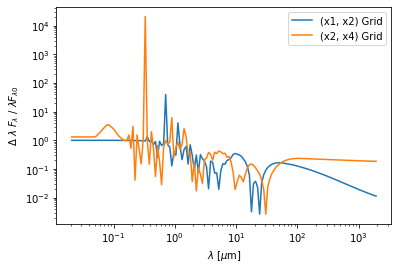

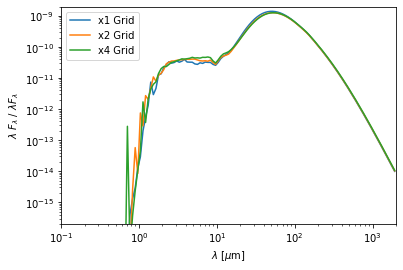

In [9]:
# Compare the models for different grid sizes
from hyperion.model import ModelOutput
from hyperion.util.constants import *

n_mult=[1, 2, 4]

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Add some axis labels 
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\Delta$ $\lambda$ $F_\lambda$ / $\lambda F_{\lambda 0}$')

m1 = ModelOutput('hyper_0.4m_2e4_1grid.rtout')
for n in n_mult[1:]:
    nphotons = np.float(n)*1e4
    m2 = ModelOutput('hyper_0.4m_2e4_%igrid.rtout' %n) # Output result

    sed1 = m1.get_sed(inclination=0, aperture=-1, distance=300 * pc)
    sed2 = m2.get_sed(inclination=0, aperture=-1, distance=300 * pc)
    ax.loglog(sed2.wav, np.abs((sed2.val-sed1.val)/sed1.val), label='(x%i, x%i) Grid'%(n/2,n))

    m1 = m2

ax.legend()
plt.show()
# Write out the plot
#fig.savefig('SED_fiducial.png')


# Create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Add some axis labels 
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda$ $F_\lambda$ / $\lambda F_{\lambda}$')

for n in n_mult:
    nphotons = np.float(n)*1e4
    m = ModelOutput('hyper_0.4m_%ie4.rtout' %n) # Output result

    sed = m.get_sed(inclination=0, aperture=-1, distance=300 * pc)
    ax.loglog(sed.wav, sed.val, label='x%i Grid'%n)


# Set view limits
ax.set_xlim(0.1, 2000.)
ax.set_ylim(2.e-16, 2.e-9)

ax.legend()
plt.show()



Increasing the grid resolution appears to have a similar effect as increasing the number of photons. The solution looks significantly smoother with 4 times the grid resolution. However, the tradeoff is in the size of the files. 4 times higher resolution ($4^3$ larger grid) gives a 10 times larger output file. Although this is still better than $n^2$ scaling!

### d) Optional: Experiment with making images. How much resolution do you require to image the source without too much noise?

The answer here depends entirely on the frequency at which you are making the image. The shorter the wavelength, the more photons are needed, because these have a much shorter mean-free-path. They are simply absorped out before reaching the viewer.  Images for long-wave lengths (e.g., > 100 um) are ok at 10,000 photons. For short wavelengths (< 10 um) $10^6$ are needed.